First import some things we'll need

In [1]:
from optimal_covering import genetic_lattice
from optcov.earth_data import clouds
from datetime import datetime

Let's look at one specific day and time

In [4]:
year = 2015
month = 4
day = 4
hour = 20

But first we should make sure to download cloud data.

I should probably make a daily downloader, but you'll probably want to have at least a month of data anyway, right?

In [ ]:
clouds.download_merra_data(year, month)

now run genetic algorithm function

Reading cloud data from MERRA file /Users/callum/Desktop/ECCC/repo/MERRA_Data/2015/04/MERRA2_400.tavg3_3d_asm_Nv.20150404.nc4


/Users/callum/Desktop/ECCC/repo/modules/optimization/genetic_helpers.py:57: RuntimeWarning: invalid value encountered in greater
  cloudmask = clouds.Clouds(time).get_clouds(time, (90, -90), out="")


Best fitness: 3.7521312419054874e+18 index 6
saved as /Users/callum/Desktop/ECCC/repo/modules/gen_0.png
'plot_individual'  2983.08 ms
'select_mating_pool'  0.12 ms
checking 1 pairings
each with 10 arrangements
'offspring'  4167.38 ms
'mutation'  43.77 ms
Best fitness: 3.82737714649848e+18 index 4
saved as /Users/callum/Desktop/ECCC/repo/modules/gen_1.png
'plot_individual'  3602.51 ms
'select_mating_pool'  0.11 ms
checking 1 pairings
each with 10 arrangements
'offspring'  4331.46 ms
'mutation'  53.46 ms
Best fitness: 4.145746707632888e+18 index 3
saved as /Users/callum/Desktop/ECCC/repo/modules/gen_2.png
'plot_individual'  7611.45 ms
'select_mating_pool'  0.13 ms
checking 1 pairings
each with 10 arrangements
'offspring'  4733.32 ms
'mutation'  40.65 ms
Best fitness: 4.168074898641345e+18 index 3
saved as /Users/callum/Desktop/ECCC/repo/modules/gen_3.png
'plot_individual'  3009.17 ms
'select_mating_pool'  0.12 ms
checking 1 pairings
each with 10 arrangements
'offspring'  4556.68 ms
'muta

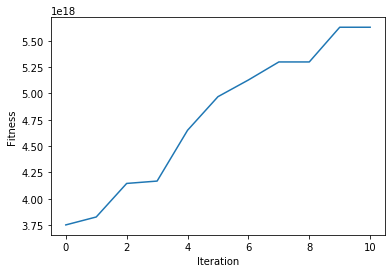

Best solution fitness :  5.627696453207655e+18


AttributeError: 'FigureManagerBase' object has no attribute 'window'

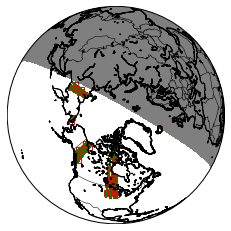

In [6]:
dtime = datetime(year, month, day, hour=hour)

genetic_lattice(
    dtime,
    generations=10,
    members_per_pop=10,
    fovs_per_member=30,
    num_parents_mating=2,
    num_mutations=1
)